<a href="https://colab.research.google.com/github/Praveencyber08/infosys/blob/main/sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweepy transformers torch pandas --quiet


In [2]:
import tweepy
import pandas as pd
from transformers import pipeline

# 🔑 Your API Key (Replace with yours)
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAMDZ4wEAAAAAQp8UvIDh0FcT%2F0jRNpgfetZTXW4%3Dl8I71fF2JPk0Slp3vdOGtQWMbQWOmvPmh6KwAjWLlWCKONBvxu"

# Initialize Tweepy client
client = tweepy.Client(bearer_token=BEARER_TOKEN)


In [3]:
# Define your topic
query = "stock market -is:retweet lang:en"

# Fetch tweets (up to 100)
tweets = client.search_recent_tweets(query=query, max_results=100)

# Store tweets in a DataFrame
data = []
for tweet in tweets.data:
    data.append(tweet.text)

df = pd.DataFrame(data, columns=["tweet"])
df.head(10)


,tweet
0,"🤟 🍅 💋 😉\nThanks to @xhybaniqued, while traders..."
1,🦃🍦🦄🚍😢\nThanks to @AlyaBarrys! I followed all s...
2,I’m seeing wide chaos and panic amongst the cs...
3,🏧🐸🌇🚼\nIf you want to make money in stock inves...
4,"@ML3democrats Stock market is doing great, cri..."
5,@OMGTheMess Not lying. ~25% (~US$680m) of Auss...
6,$GPRO ⚙️ Pre-Earnings Setup\n\nQ3 results due ...
7,🧧🉐\nIf you want to make money in stock investm...
8,@KobeissiLetter there you go stock market and ...
9,$SGBX SETS UP FOR AN ENERGY INFRASTRUCTURE BRE...


In [4]:
# Load pretrained sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply sentiment analysis
df["sentiment"] = df["tweet"].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])
df["confidence"] = df["tweet"].apply(lambda x: sentiment_pipeline(x[:512])[0]['score'])

df.head(10)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


,tweet,sentiment,confidence
0,"🤟 🍅 💋 😉\nThanks to @xhybaniqued, while traders...",NEGATIVE,0.998177
1,🦃🍦🦄🚍😢\nThanks to @AlyaBarrys! I followed all s...,POSITIVE,0.890706
2,I’m seeing wide chaos and panic amongst the cs...,NEGATIVE,0.995965
3,🏧🐸🌇🚼\nIf you want to make money in stock inves...,NEGATIVE,0.993955
4,"@ML3democrats Stock market is doing great, cri...",NEGATIVE,0.895478
5,@OMGTheMess Not lying. ~25% (~US$680m) of Auss...,NEGATIVE,0.925887
6,$GPRO ⚙️ Pre-Earnings Setup\n\nQ3 results due ...,POSITIVE,0.984040
7,🧧🉐\nIf you want to make money in stock investm...,NEGATIVE,0.996976
8,@KobeissiLetter there you go stock market and ...,NEGATIVE,0.991923
9,$SGBX SETS UP FOR AN ENERGY INFRASTRUCTURE BRE...,NEGATIVE,0.987203


In [5]:
df.to_csv("twitter_sentiment_data.csv", index=False)
print("✅ Data saved to twitter_sentiment_data.csv")


✅ Data saved to twitter_sentiment_data.csv


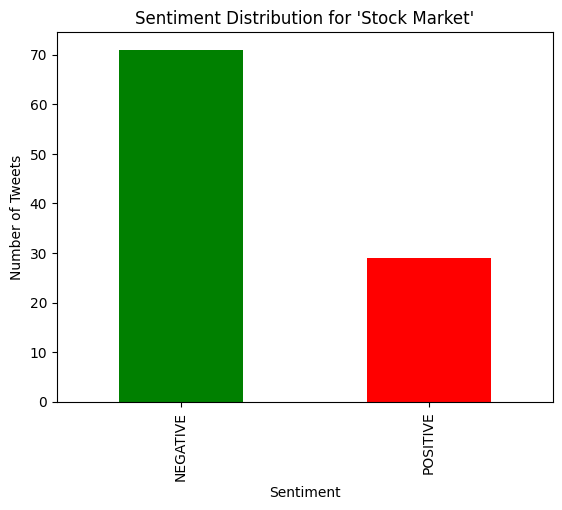

In [6]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Sentiment Distribution for 'Stock Market'")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()
